# Proyek Analisis Data: [Bike Sharing]
- **Nama:** [Ridho Setiawan]
- **Email:** [ridhosetiawan24406@gmail.com]
- **ID Dicoding:** [ridho_setiawan]

## Menentukan Pertanyaan Bisnis

- Bagaimana Pengaruh Musim terhadap Penggunaan Bike Sharing?
- Kapan Waktu Puncak Penggunaan Bike Sharing dalam Sehari Berdasarkan Rata-rata?

## Import Semua Packages/Library yang Digunakan

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

## Data Wrangling

### Gathering Data

In [67]:
day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [68]:
hour_df = pd.read_csv("data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

#### Menilai tabel `day_df`

In [69]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [70]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [71]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [72]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Menilai tabel `hour_df`

In [73]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [74]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [75]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [76]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

In [77]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

In [78]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [79]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [80]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

### Explore `day_df`

In [81]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
674,675,2012-11-05,4,1,11,0,1,1,1,0.319167,0.308075,0.494167,0.236325,378,4881,5259
623,624,2012-09-15,3,1,9,0,6,0,1,0.608333,0.585867,0.501667,0.247521,3160,5554,8714
540,541,2012-06-24,3,1,6,0,0,0,1,0.743333,0.674254,0.479167,0.145525,2551,4340,6891
437,438,2012-03-13,1,1,3,0,2,1,1,0.565000,0.542929,0.617500,0.236950,762,5085,5847
365,366,2012-01-01,1,1,1,0,0,0,1,0.370000,0.375621,0.692500,0.192167,686,1608,2294


In [82]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [83]:
print(f"Total penggunaan bike sharing oleh pengguna casual: {day_df['casual'].sum()}")

Total penggunaan bike sharing oleh pengguna casual: 620017


In [84]:
'''
jumlah penggunaan bike sharing berdasarkan pengguna casual 
1 = musim semi
2 = musim panas
3 = musim gugur
4 = musim dingin
'''

# Memfilter data untuk musim semi (springer, season == 1)
springer_df = day_df[day_df['season'] == 1]
# Mengelompokkan data berdasarkan 'casual'
casual_usage_springer = springer_df['casual'].sum()
# Menampilkan hasil
print(f"Jumlah penggunaan bike sharing oleh pengguna casual di musim semi: {casual_usage_springer}")

# Memfilter data untuk musim panas (summer, season == 2)
summer_df = day_df[day_df['season'] == 2]

casual_usage_summer = summer_df['casual'].sum()

print(f"Jumlah penggunaan bike sharing oleh pengguna casual di musim panas: {casual_usage_summer}")

# Memfilter data untuk musim gugur (fall, season == 3)
fall_df = day_df[day_df['season'] == 3]

casual_usage_fall = fall_df['casual'].sum()

print(f"Jumlah penggunaan bike sharing oleh pengguna casual di musim gugur: {casual_usage_fall}")

# Memfilter data untuk musim dingin (winter, season == 4)
winter_df = day_df[day_df['season'] == 4]
# Mengelompokkan data berdasarkan 'casual'

casual_usage_winter = winter_df['casual'].sum()
print(f"Jumlah penggunaan bike sharing oleh pengguna casual di musim dingin: {casual_usage_winter}")


Jumlah penggunaan bike sharing oleh pengguna casual di musim semi: 60622
Jumlah penggunaan bike sharing oleh pengguna casual di musim panas: 203522
Jumlah penggunaan bike sharing oleh pengguna casual di musim gugur: 226091
Jumlah penggunaan bike sharing oleh pengguna casual di musim dingin: 129782


In [85]:
print(f"Total penggunaan bike sharing oleh pengguna registered: {day_df['registered'].sum()}")

Total penggunaan bike sharing oleh pengguna registered: 2672662


In [86]:
'''
jumlah penggunaan bike sharing berdasarkan pengguna registered 
1 = musim semi
2 = musim panas
3 = musim gugur
4 = musim dingin
'''

# Memfilter data untuk musim semi (springer, season == 1)
springer_df = day_df[day_df['season'] == 1]
# Mengelompokkan data berdasarkan 'registered'
registered_usage_springer = springer_df['registered'].sum()
# Menampilkan hasil
print(f"Jumlah penggunaan bike sharing oleh pengguna registered di musim semi: {registered_usage_springer}")

# Memfilter data untuk musim panas (summer, season == 2)
summer_df = day_df[day_df['season'] == 2]

registered_usage_summer = summer_df['registered'].sum()

print(f"Jumlah penggunaan bike sharing oleh pengguna registered di musim panas: {registered_usage_summer}")

# Memfilter data untuk musim gugur (fall, season == 3)
fall_df = day_df[day_df['season'] == 3]

registered_usage_fall = fall_df['registered'].sum()

print(f"Jumlah penggunaan bike sharing oleh pengguna registered di musim gugur: {registered_usage_fall}")

# Memfilter data untuk musim dingin (winter, season == 4)
winter_df = day_df[day_df['season'] == 4]
# Mengelompokkan data berdasarkan 'registered'

registered_usage_winter = winter_df['registered'].sum()
print(f"Jumlah penggunaan bike sharing oleh pengguna registered di musim dingin: {registered_usage_winter}")


Jumlah penggunaan bike sharing oleh pengguna registered di musim semi: 410726
Jumlah penggunaan bike sharing oleh pengguna registered di musim panas: 715067
Jumlah penggunaan bike sharing oleh pengguna registered di musim gugur: 835038
Jumlah penggunaan bike sharing oleh pengguna registered di musim dingin: 711831


In [87]:
print(f"Total penggunaan bike sharing oleh pengguna cnt: {day_df['cnt'].sum()}")

Total penggunaan bike sharing oleh pengguna cnt: 3292679


In [88]:
'''
jumlah penggunaan bike sharing berdasarkan pengguna cnt 
1 = musim semi
2 = musim panas
3 = musim gugur
4 = musim dingin
'''

# Memfilter data untuk musim semi (springer, season == 1)
springer_df = day_df[day_df['season'] == 1]
# Mengelompokkan data berdasarkan 'cnt'
cnt_usage_springer = springer_df['cnt'].sum()
# Menampilkan hasil
print(f"Jumlah penggunaan bike sharing oleh pengguna cnt di musim semi: {cnt_usage_springer}")

# Memfilter data untuk musim panas (summer, season == 2)
summer_df = day_df[day_df['season'] == 2]

cnt_usage_summer = summer_df['cnt'].sum()

print(f"Jumlah penggunaan bike sharing oleh pengguna cnt di musim panas: {cnt_usage_summer}")

# Memfilter data untuk musim gugur (fall, season == 3)
fall_df = day_df[day_df['season'] == 3]

cnt_usage_fall = fall_df['cnt'].sum()

print(f"Jumlah penggunaan bike sharing oleh pengguna cnt di musim gugur: {cnt_usage_fall}")

# Memfilter data untuk musim dingin (winter, season == 4)
winter_df = day_df[day_df['season'] == 4]
# Mengelompokkan data berdasarkan 'cnt'

cnt_usage_winter = winter_df['cnt'].sum()
print(f"Jumlah penggunaan bike sharing oleh pengguna cnt di musim dingin: {cnt_usage_winter}")


Jumlah penggunaan bike sharing oleh pengguna cnt di musim semi: 471348
Jumlah penggunaan bike sharing oleh pengguna cnt di musim panas: 918589
Jumlah penggunaan bike sharing oleh pengguna cnt di musim gugur: 1061129
Jumlah penggunaan bike sharing oleh pengguna cnt di musim dingin: 841613


### Explore `hour_df`

In [89]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
2690,2691,2011-04-27,2,0,4,0,0,3,1,1,0.60,0.5606,0.83,0.2239,3,24,27
10373,10374,2012-03-13,1,1,3,8,0,2,1,1,0.46,0.4545,0.82,0.2836,22,571,593
6784,6785,2011-10-15,4,0,10,6,0,6,0,1,0.40,0.4091,0.71,0.0000,5,15,20
6568,6569,2011-10-06,4,0,10,6,0,4,1,1,0.40,0.4091,0.66,0.1940,4,110,114
7173,7174,2011-10-31,4,0,10,12,0,1,1,1,0.42,0.4242,0.44,0.2239,30,140,170


In [90]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [91]:
# Mengelompokkan data berdasarkan jam dan menghitung rata-rata penggunaan
hourly_usage = hour_df.groupby('hr').agg({
    'casual': 'mean',
    'registered': 'mean',
    'cnt': 'mean'
}).reset_index()

# Mengurutkan DataFrame berdasarkan kolom 'cnt'
hourly_usage_sorted = hourly_usage.sort_values(by='cnt', ascending=False)

# Menampilkan hasil
print(hourly_usage_sorted)

    hr     casual  registered         cnt
17  17  74.273973  387.178082  461.452055
18  18  61.120879  364.390110  425.510989
8    8  21.679505  337.331499  359.011004
16  16  73.745205  238.238356  311.983562
19  19  48.770604  262.752747  311.523352
13  13  72.308642  181.352538  253.661180
12  12  68.293956  185.021978  253.315934
15  15  74.905350  176.327846  251.233196
14  14  75.567901  165.381344  240.949246
20  20  36.233516  189.796703  226.030220
9    9  30.891334  188.418157  219.309491
7    7  11.055021  201.009629  212.064649
11  11  59.540578  148.602476  208.143054
10  10  46.477304  127.191197  173.668501
21  21  28.255495  144.059066  172.314560
22  22  22.252747  109.082418  131.335165
23  23  15.199176   72.631868   87.831044
6    6   4.161379   71.882759   76.044138
0    0  10.158402   43.739669   53.898072
1    1   6.504144   26.871547   33.375691
2    2   4.772028   18.097902   22.869930
5    5   1.411437   18.478382   19.889819
3    3   2.715925    9.011478   11

In [92]:
main_data_df = pd.merge(
    left=day_df,
    right=hour_df,
    how="left",
    left_on="instant",
    right_on="instant"
)
main_data_df.head()

,instant,dteday_x,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Visualization & Explanatory Analysis

### Pertanyaan 1:

(0.0, 1167241.9)

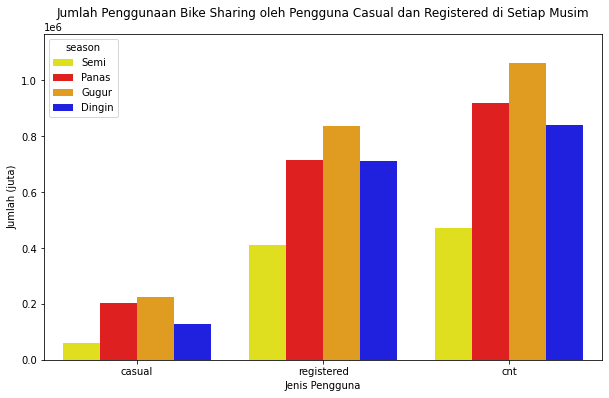

In [93]:
import streamlit as st
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd

# Mengelompokkan data berdasarkan musim dan menghitung jumlah penggunaan
seasonal_usage = day_df.groupby('season').agg({
    'casual': 'sum',
    'registered': 'sum',
    'cnt': 'sum'
}).reset_index()

# Mapping season ke string
season_mapping = {
    1: 'Semi',
    2: 'Panas',
    3: 'Gugur',
    4: 'Dingin'
}
seasonal_usage['season'] = seasonal_usage['season'].map(season_mapping)

# Mengubah format DataFrame untuk visualisasi
seasonal_usage_melted = seasonal_usage.melt(id_vars=['season'], value_vars=['casual', 'registered', 'cnt'],
                                            var_name='Jenis Pengguna', value_name='Jumlah')

# Definisikan palette warna yang diinginkan
bar_colour = {
    'Semi': 'yellow',
    'Panas': 'red',
    'Gugur': 'orange',
    'Dingin': 'blue'
}

fig, ax = plt.subplots(figsize=(10, 6))
sn.barplot(data=seasonal_usage_melted, x='Jenis Pengguna', y='Jumlah', hue='season', palette=bar_colour, errorbar=None, ax=ax)
ax.set_title('Jumlah Penggunaan Bike Sharing oleh Pengguna Casual dan Registered di Setiap Musim')
ax.set_xlabel('Jenis Pengguna')
ax.set_ylabel('Jumlah (juta)')

# Mengatur batas sumbu y secara manual untuk memberikan ruang ekstra
max_y = seasonal_usage_melted['Jumlah'].max()
padding = 0.1 * max_y  # Tambahkan 10% dari nilai maksimum sebagai ruang ekstra
ax.set_ylim(0, max_y + padding)

### Pertanyaan 2:

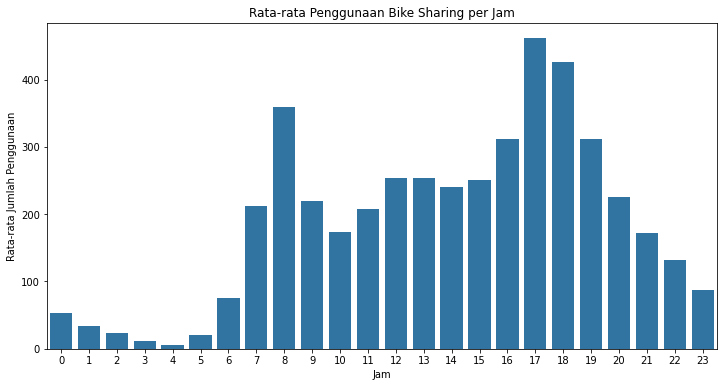

In [94]:
# Mengelompokkan data berdasarkan jam dan menghitung rata-rata penggunaan
hourly_usage = hour_df.groupby('hr').agg({
    'casual': 'mean',
    'registered': 'mean',
    'cnt': 'mean'
}).reset_index()

# Mengurutkan DataFrame berdasarkan kolom 'cnt'
hourly_usage_sorted = hourly_usage.sort_values(by='cnt', ascending=False)

# Visualisasi menggunakan bar chart
plt.figure(figsize=(12, 6))
sn.barplot(data=hourly_usage_sorted, x='hr', y='cnt')
plt.title('Rata-rata Penggunaan Bike Sharing per Jam')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Jumlah Penggunaan')
plt.show()

## Conclusion

- Musim memiliki pengaruh yang besar terhadap penggunaan bike sharing, musim gugur adalah musim dengan jumlah penggunaan terbanyak dan musim semi dengan penggunaan paling sedikit
- Puncak penggunaan bike sharing tertinggi berada di pukul 17 dan penggunaan terendah berada di pukul 4